# Univariate non-graphical EDA

In [1]:
import pandas as pd # Import the pandas library for data manipulation and analysis

In [2]:
df = pd.read_csv("AB_NYC_2019.csv") # Load the dataset into a pandas DataFrame

In [3]:
df.head() # Display the first few rows of the DataFrame

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


In [4]:
df.shape

(48906, 16)

In [5]:
df["id"]=df["id"].astype(str)
df["host_id"]=df["host_id"].astype(str)
df["latitude"]=df["latitude"].astype(str)
df["longitude"]=df["longitude"].astype(str)

How does the data look mathematically?

In [6]:
df.describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48906.000000,48906.000000,48906.000000,38854.000000,48906.000000,48906.000000
mean,152.711324,7.031612,23.300454,1.373151,7.142702,112.782031
std,240.128713,20.512489,44.607175,1.680270,32.948926,131.620370
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


range of minimum nights for listings is 1 and 1250

# Categorical Data

In [7]:
df.nunique()

,0
id,48895
name,47896
host_id,37457
host_name,11452
neighbourhood_group,5
neighbourhood,221
latitude,19048
longitude,14718
room_type,3
price,674


In [8]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [9]:
# Count the occurrences of each room type
df["room_type"].value_counts()

,count
room_type,
Entire home/apt,25414
Private room,22332
Shared room,1160


In [10]:
# Calculate the percentage distribution of each room type
df["room_type"].value_counts(normalize = True)

,proportion
room_type,
Entire home/apt,0.519650
Private room,0.456631
Shared room,0.023719


In [11]:
# Count the occurrences of each neighbourhood group
df["neighbourhood_group"].value_counts()

,count
neighbourhood_group,
Manhattan,21669
Brooklyn,20107
Queens,5666
Bronx,1091
Staten Island,373


# Numerical Data

In [12]:
df["price"].value_counts(bins = 5)

,count
"(-10.001, 2000.0]",48820
"(2000.0, 4000.0]",54
"(4000.0, 6000.0]",16
"(6000.0, 8000.0]",9
"(8000.0, 10000.0]",7


In [13]:
bins = [-10,0, 50,100, 200,500,800,2000,4000,10000]
df["price"].value_counts(bins = bins)

,count
"(50.0, 100.0]",17373
"(100.0, 200.0]",16588
"(200.0, 500.0]",7340
"(0.0, 50.0]",6550
"(500.0, 800.0]",624
"(800.0, 2000.0]",334
"(2000.0, 4000.0]",54
"(4000.0, 10000.0]",32
"(-10.001, 0.0]",11


It is mainly helpful in small datasets.

## Measures of central tendency

In [14]:
df["price"].mean()

np.float64(152.71132376395533)

In [15]:
df["price"].median()

106.0

In [16]:
df["price"].std()

240.1287131622437

In [17]:
df["minimum_nights"].mean() # Calculate the mean of the 'minimum_nights' column

np.float64(7.031611663190611)

In [18]:
df["minimum_nights"].median() # Calculate the median of the 'minimum_nights' column

3.0

## Measure of Spread

In [19]:
df["price"].skew() # Calculate the skewness of the 'price' column

np.float64(19.120831694826197)

In [20]:
df["price"].kurt() # Calculate the kurtosis of the 'price' column

np.float64(585.7930484394186)

How many listings have availability throughout the year (365 days)

In [21]:
df[df["availability_365"]==365].shape[0] # Count the number of listings with availability throughout the year (365 days)

1295

In [22]:
df.select_dtypes(include=['float64', 'int64']).corr() # Calculate the correlation matrix for numerical columns

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.042771,-0.048014,-0.030608,0.057478,0.081817
minimum_nights,0.042771,1.000000,-0.080093,-0.121772,0.127917,0.144146
number_of_reviews,-0.048014,-0.080093,1.000000,0.549291,-0.072375,0.172002
reviews_per_month,-0.030608,-0.121772,0.549291,1.000000,-0.009414,0.185818
calculated_host_listings_count,0.057478,0.127917,-0.072375,-0.009414,1.000000,0.225680
availability_365,0.081817,0.144146,0.172002,0.185818,0.225680,1.000000


# Graphical Analysis

# Bar Graph

<Axes: xlabel='room_type', ylabel='count'>

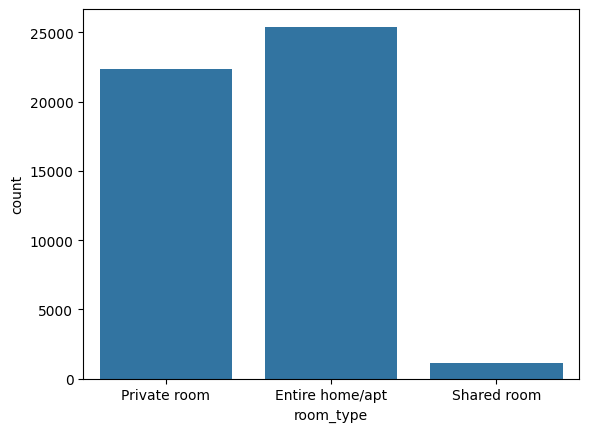

In [23]:
import seaborn as sns
sns.countplot( x=df["room_type"])

<Axes: xlabel='neighbourhood_group', ylabel='count'>

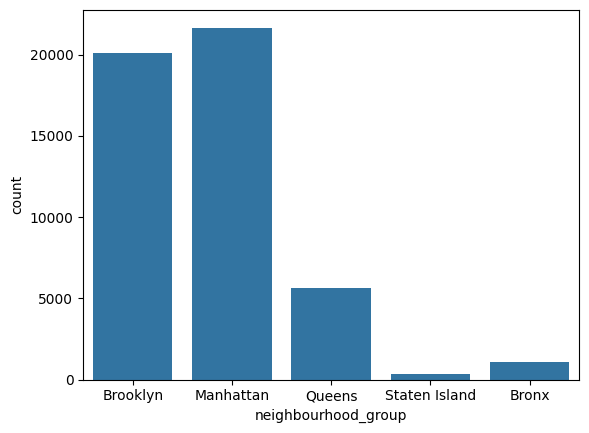

In [24]:
sns.countplot(data=df, x="neighbourhood_group")

<Axes: xlabel='neighbourhood_group', ylabel='count'>

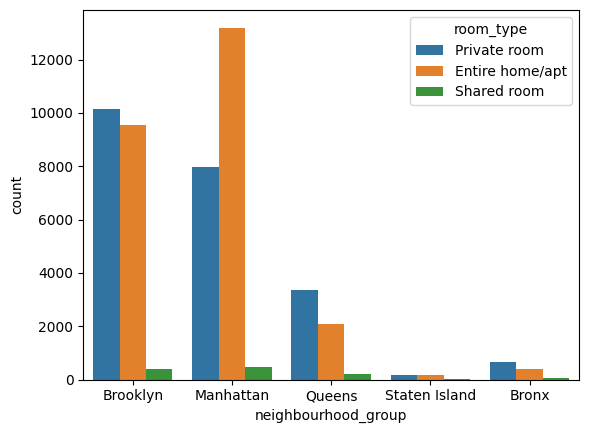

In [25]:
sns.countplot(data = df, x ="neighbourhood_group" , hue = "room_type")

#Pie Chart


<Axes: ylabel='count'>

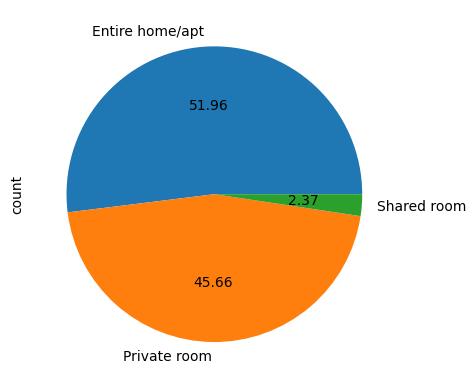

In [26]:
df["room_type"].value_counts().plot(kind="pie",autopct="%.2f")

<Axes: xlabel='availability_365'>

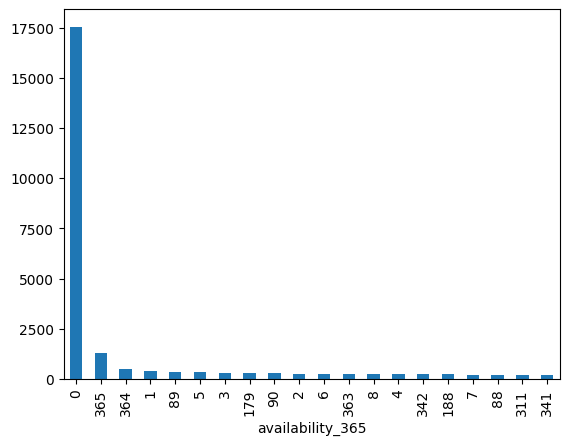

In [27]:
df["availability_365"].value_counts().head(20).plot(kind ="bar")

In [28]:
df2=sns.load_dataset("titanic")

In [29]:
df2.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [30]:
df2.shape

(891, 15)

<Axes: xlabel='embark_town', ylabel='count'>

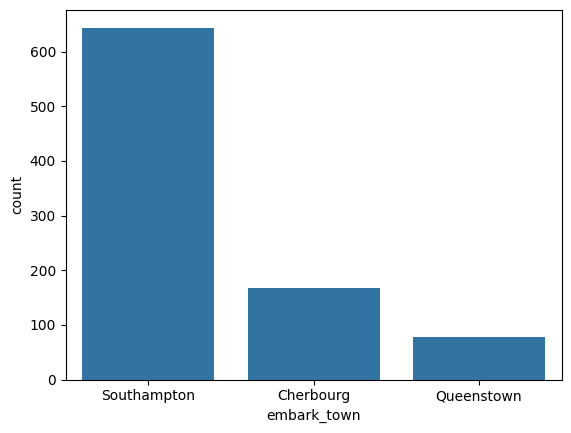

In [31]:
sns.countplot(x=df2["embark_town"])

<Axes: ylabel='count'>

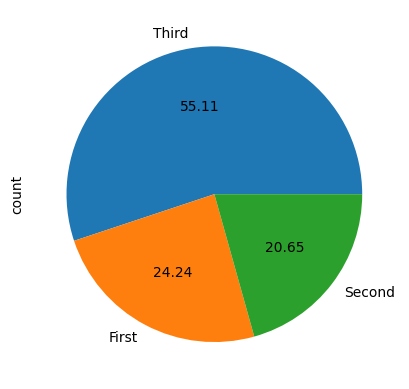

In [32]:
df2["class"].value_counts().plot(kind="pie",autopct="%.2f")

<Axes: xlabel='alone', ylabel='count'>

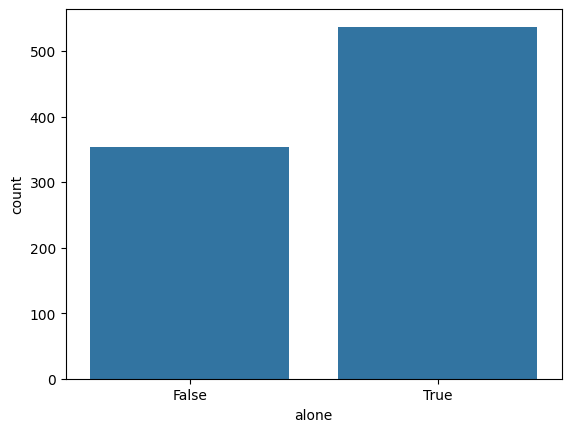

In [33]:
sns.countplot(x=df2["alone"])

#Univariate Analysis (numerical)

<Axes: xlabel='price', ylabel='Count'>

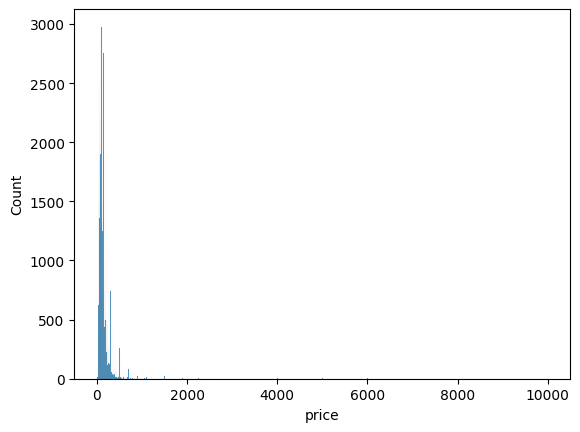

In [34]:
sns.histplot(data=df,x="price")#we only take x value bcz it's working on count value

<Axes: xlabel='price', ylabel='Count'>

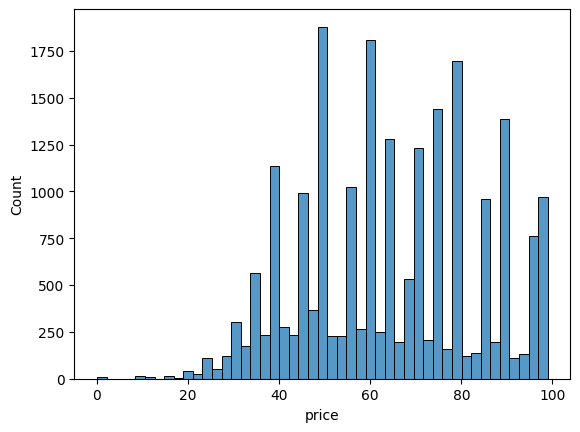

In [35]:
sns.histplot(data=df[df["price"]<100],x="price")

<Axes: xlabel='availability_365', ylabel='Count'>

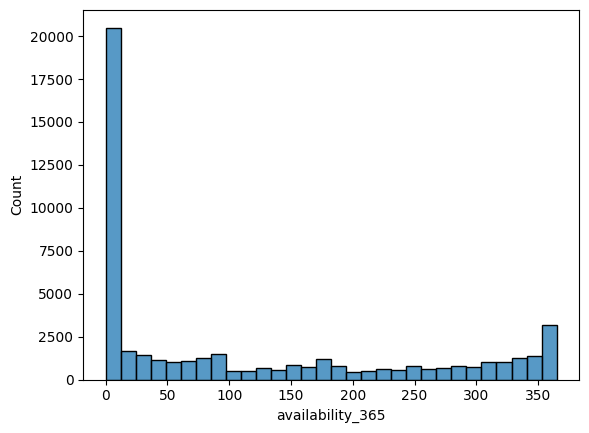

In [36]:
sns.histplot(data=df,x="availability_365")

#Distplot

/tmp/ipython-input-798374220.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["price"])#histplot is better to see distribution of data with wiss values


<Axes: xlabel='price', ylabel='Density'>

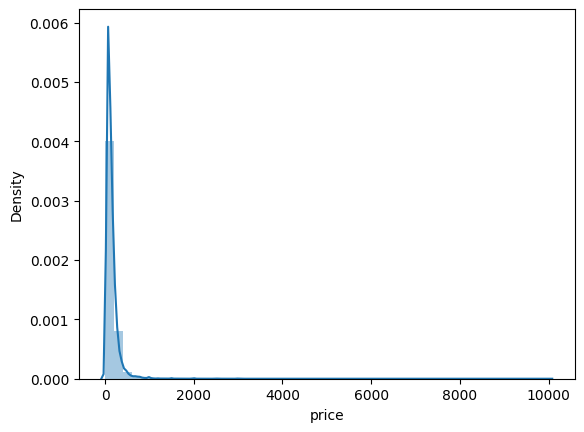

In [37]:
sns.distplot(df["price"])#histplot is better to see distribution of data with wiss values

In [38]:
df["price"].value_counts(bins=20)

,count
"(-10.001, 500.0]",47862
"(500.0, 1000.0]",805
"(1000.0, 1500.0]",100
"(1500.0, 2000.0]",53
"(2500.0, 3000.0]",21
"(2000.0, 2500.0]",20
"(3500.0, 4000.0]",11
"(4000.0, 4500.0]",6
"(4500.0, 5000.0]",6
"(9500.0, 10000.0]",6


/tmp/ipython-input-1689079129.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["availability_365"])#gives probablity and distribution graph


<Axes: xlabel='availability_365', ylabel='Density'>

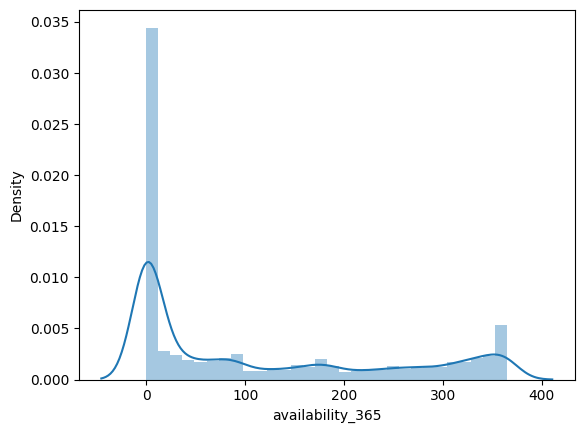

In [39]:
sns.distplot(df["availability_365"])#gives probablity and distribution graph
#distplot provides a better distribution for large datasets

/tmp/ipython-input-2533210752.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["reviews_per_month"])


<Axes: xlabel='reviews_per_month', ylabel='Density'>

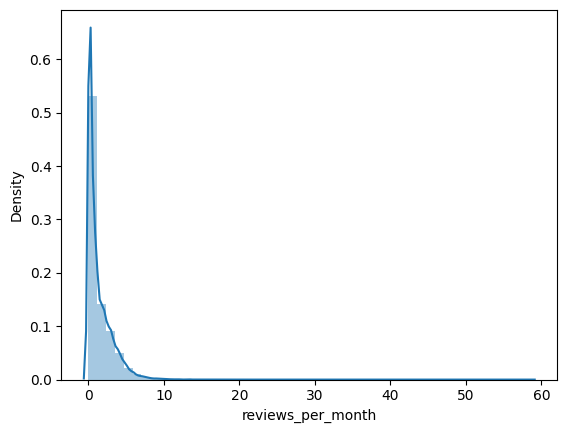

In [40]:
sns.distplot(df["reviews_per_month"])

#Boxplot

<Axes: ylabel='price'>

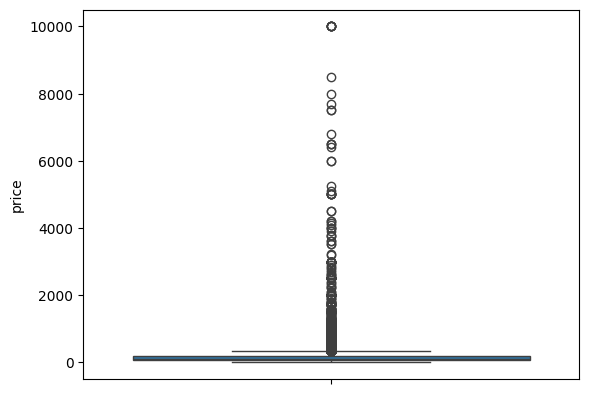

In [41]:
sns.boxplot(df["price"])

<Axes: ylabel='availability_365'>

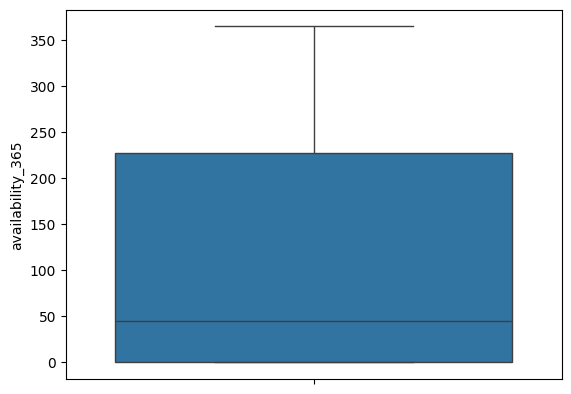

In [42]:
sns.boxplot(df["availability_365"])

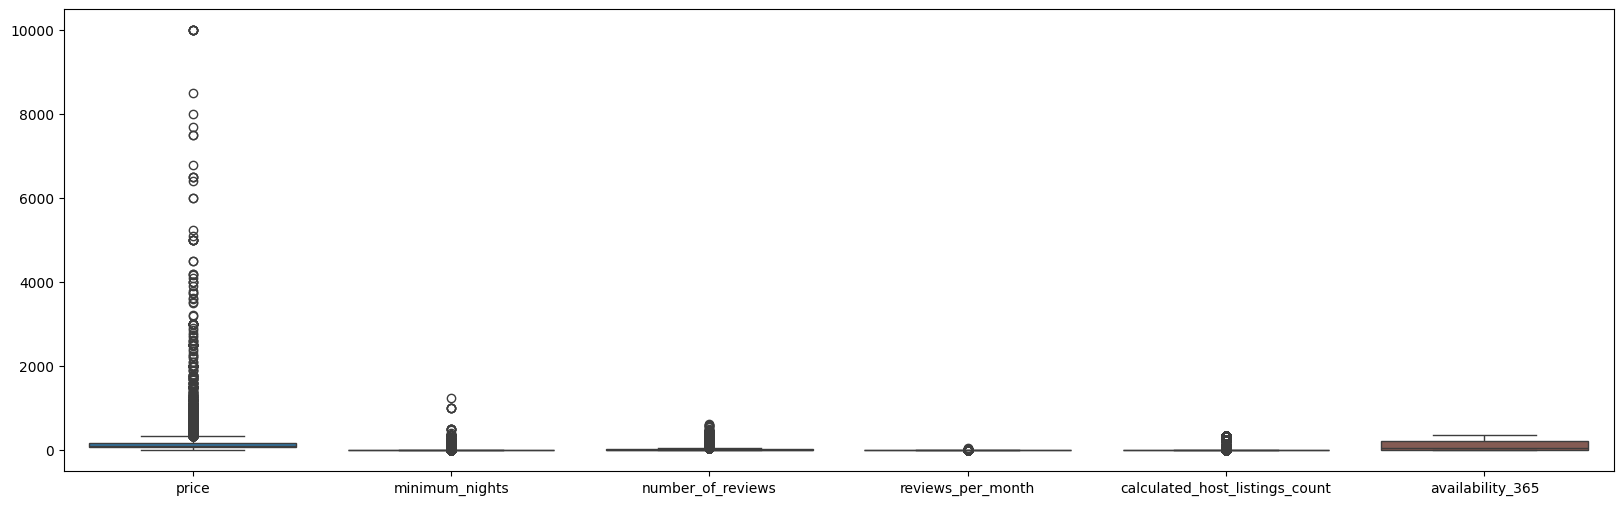

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 6))
sns.boxplot(data=df)

plt.show()

In [44]:
df2=sns.load_dataset('titanic')

<Axes: xlabel='fare', ylabel='Count'>

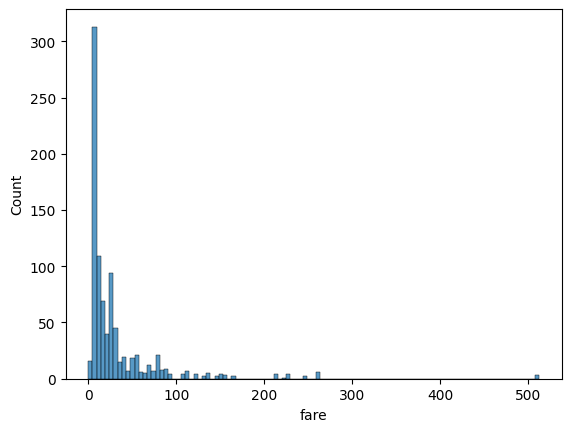

In [45]:
sns.histplot(data=df2,x="fare")

/tmp/ipython-input-3524834500.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2["fare"])


<Axes: xlabel='fare', ylabel='Density'>

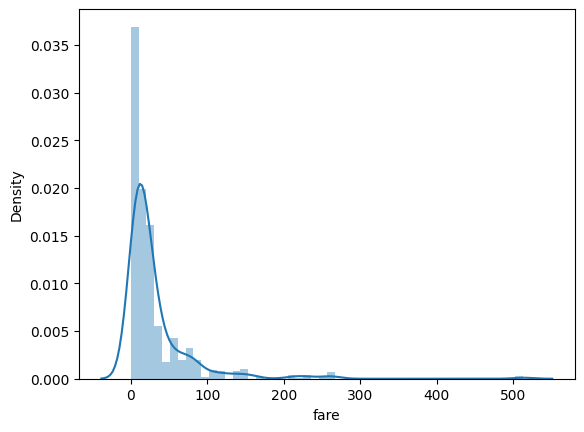

In [46]:
sns.distplot(df2["fare"])

<Axes: ylabel='fare'>

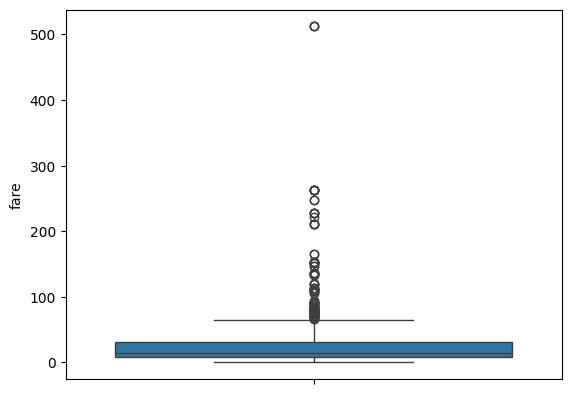

In [47]:
sns.boxplot(df2["fare"])

<Axes: ylabel='age'>

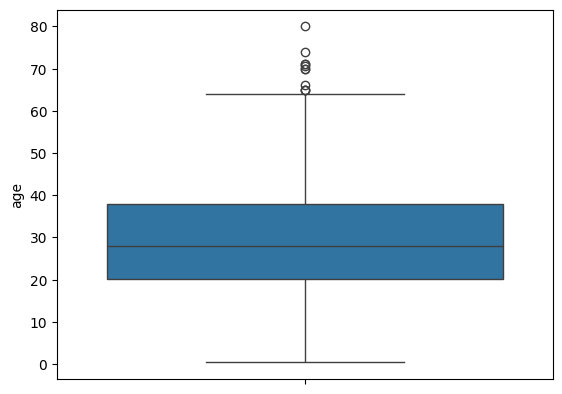

In [48]:
sns.boxplot(df2['age'])

<Axes: >

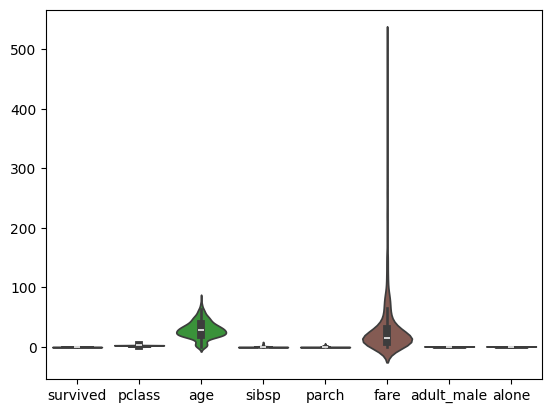

In [49]:
sns.violinplot(df2)

<Axes: ylabel='age'>

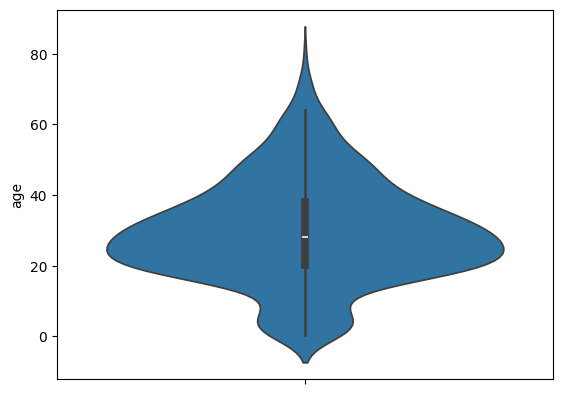

In [50]:
sns.violinplot(df2['age'])

#Bivariate Analysis(Numerical)

In [51]:
df2=sns.load_dataset("titanic")
df2.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: xlabel='class', ylabel='age'>

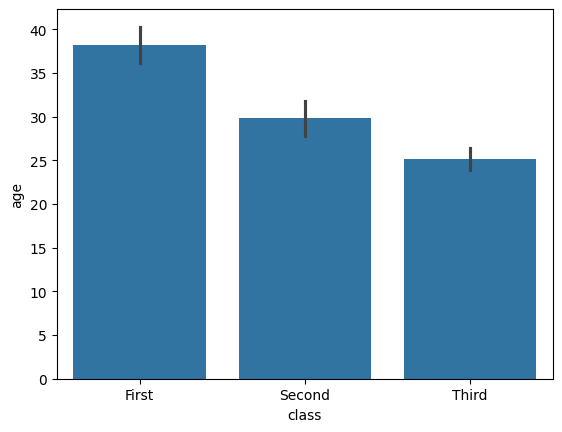

In [52]:
sns.barplot(x="class",y="age",data=df2)

<Axes: xlabel='class', ylabel='age'>

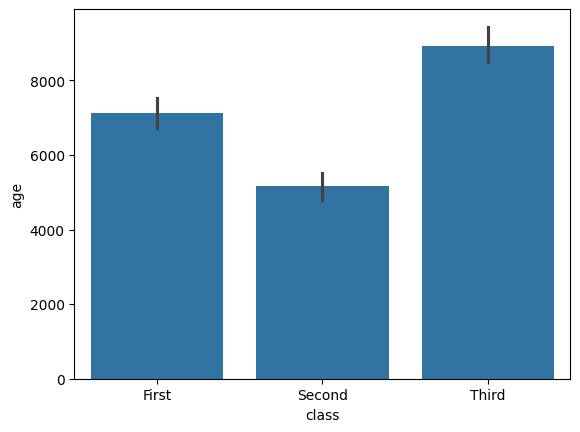

In [53]:
sns.barplot(x="class",y="age",data=df2,estimator='sum')

<Axes: xlabel='class', ylabel='age'>

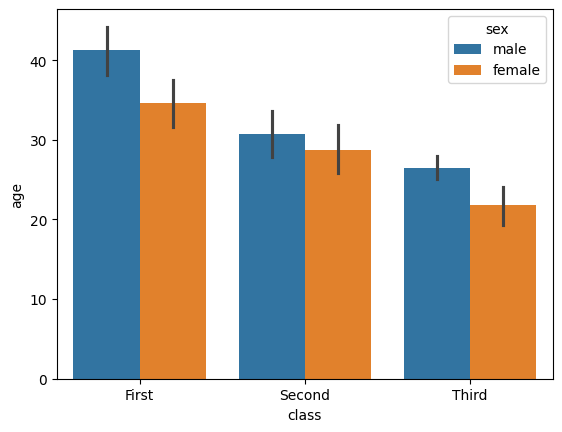

In [54]:
sns.barplot(x="class",y="age",hue="sex",data=df2)

<Axes: xlabel='class', ylabel='age'>

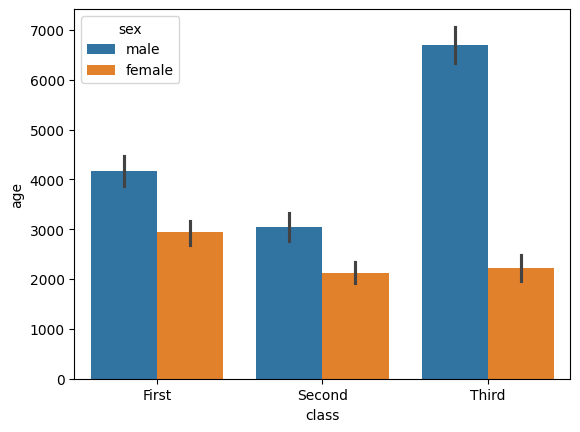

In [55]:
sns.barplot(x="class",y="age",hue="sex",estimator="sum",data=df2)

<Axes: xlabel='class', ylabel='age'>

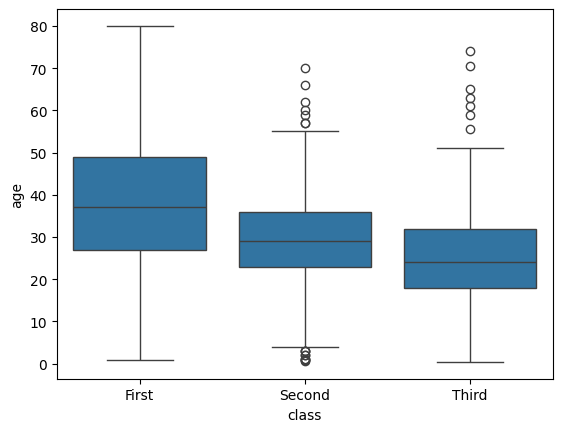

In [56]:
sns.boxplot(x="class",y="age",data=df2)

<Axes: xlabel='class', ylabel='age'>

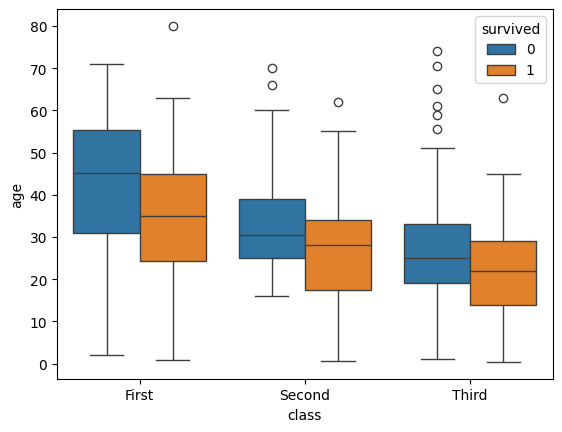

In [57]:
sns.boxplot(x="class",y="age",hue="survived",data=df2)

<Axes: xlabel='class', ylabel='age'>

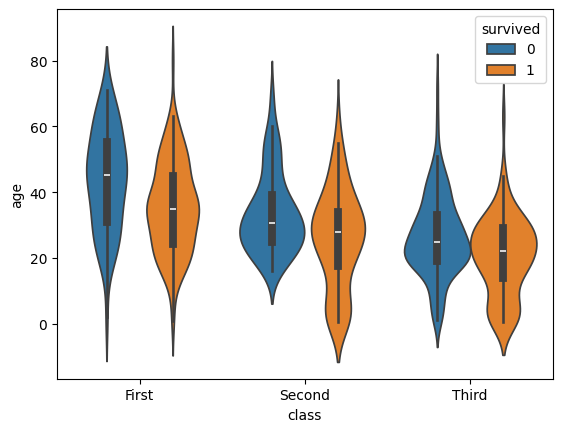

In [58]:
sns.violinplot(x="class",y="age",hue="survived",data=df2)
#for distibution of data

/tmp/ipython-input-1680266966.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[df2["class"]=="Second"]["age"])


<Axes: xlabel='age', ylabel='Density'>

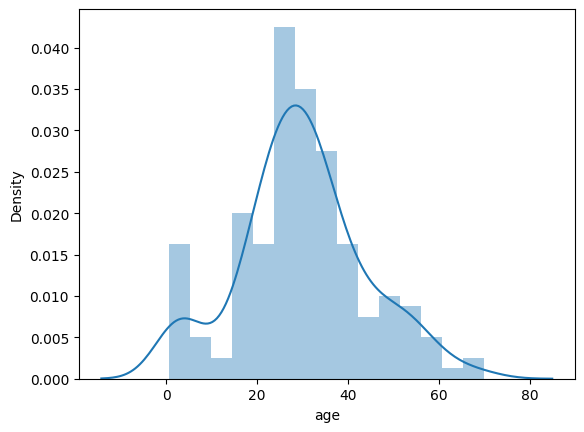

In [59]:
sns.distplot(df2[df2["class"]=="Second"]["age"])

#Bivariate Analysis(Categorical)

<Axes: xlabel='survived', ylabel='count'>

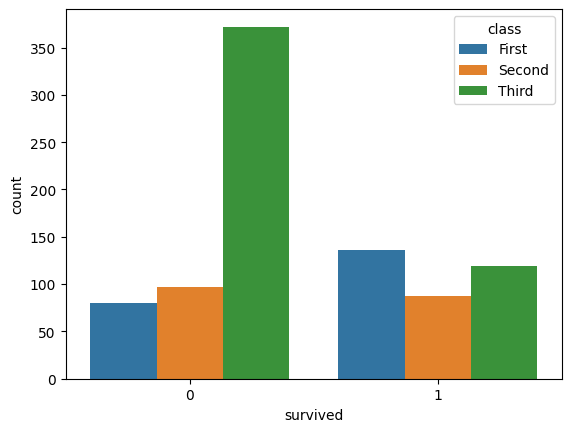

In [60]:
sns.countplot(x="survived",hue="class",data=df2)

In [61]:
#pivot table to visualise 2 categorical data
x=pd.crosstab(df2["survived"],df2["class"])

In [62]:
x

class,First,Second,Third
survived,,,
0,80,97,372
1,136,87,119


<Axes: xlabel='class', ylabel='survived'>

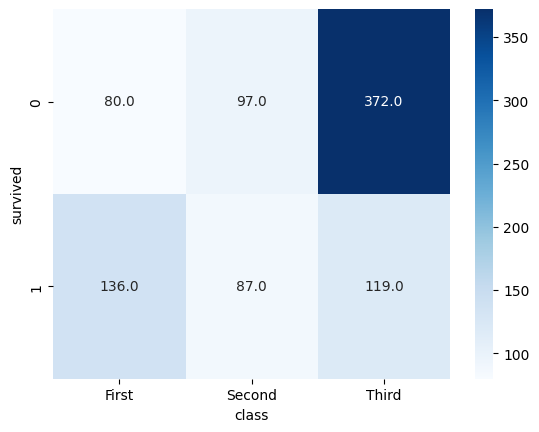

In [63]:
sns.heatmap(x,annot=True,fmt=".1f",cmap="Blues")

<Axes: xlabel='class', ylabel='survived'>

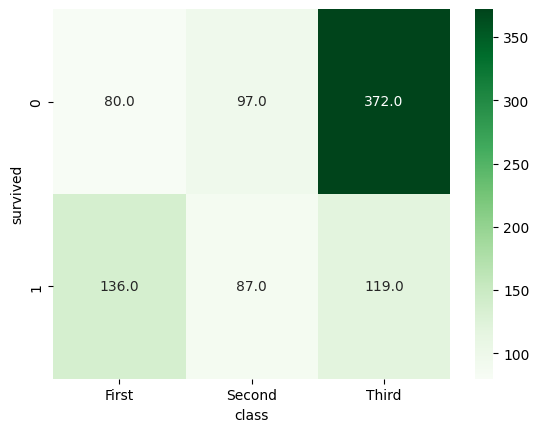

In [64]:
sns.heatmap(x,annot=True,fmt=".1f",cmap="Greens")

<Axes: xlabel='class', ylabel='age'>

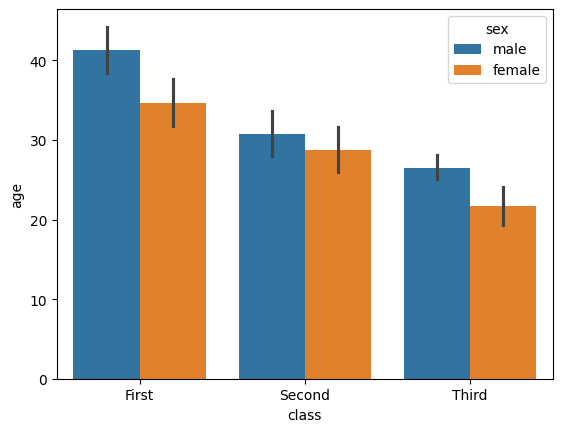

In [65]:
sns.barplot(x="class",y="age",hue="sex",data=df2)
#it take the values either the estimator=sum,mean.median

<Axes: xlabel='class', ylabel='age'>

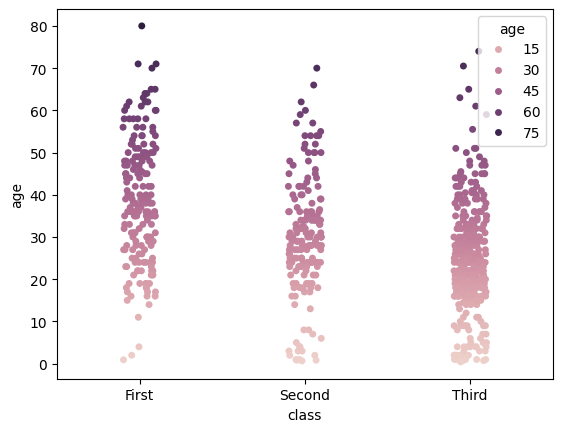

In [66]:
#to see the distribution of points we use stripplot
sns.stripplot(x="class",y="age",hue="age",data=df2)

#FURTHER ANALYSIS

In [67]:
df3=sns.load_dataset("iris")

In [68]:
df3.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


<Axes: >

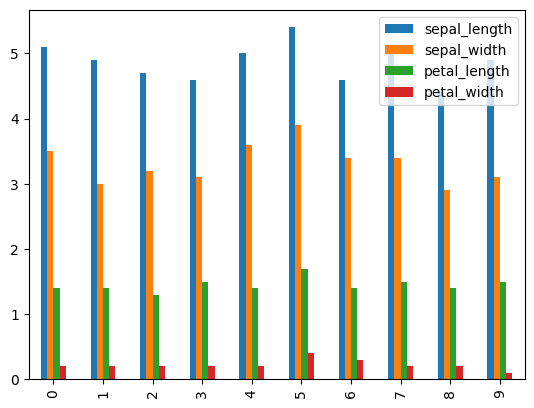

In [69]:
df3.head(10).plot(kind="bar")

<Axes: >

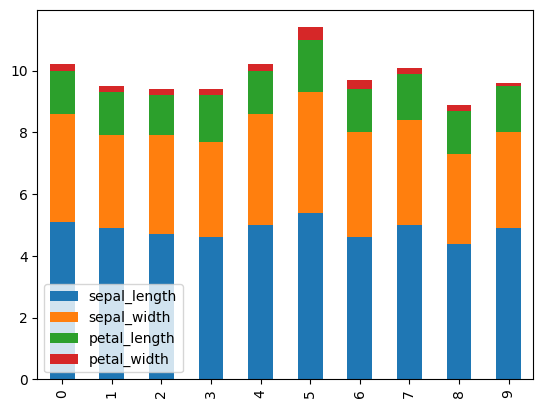

In [70]:
df3.head(10).plot(kind="bar",stacked=True)

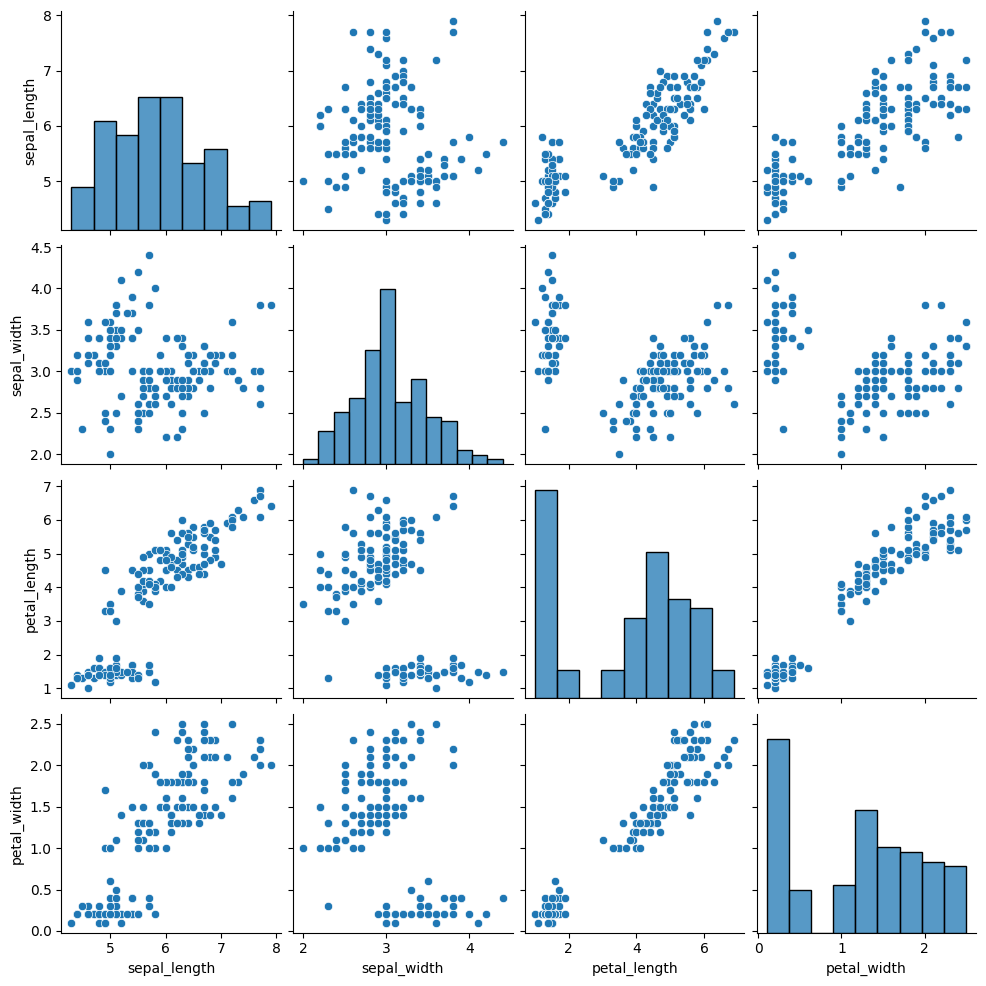

In [71]:
#for relation between numerical columns use pairplot
sns.pairplot(df3)

Scatter plot- for non equal numerical value

 histplot- for equal columns numerical values